In [1]:
%pylab inline
import scipy
from scipy.sparse import coo_matrix, block_diag, identity, hstack
import matplotlib.pyplot as plt
from pyiga import bspline, vform, geometry, vis, solvers, utils, topology
from pyiga import assemble
from sksparse.cholmod import cholesky
from pyiga import adaptive as adap
import json
from os.path import exists
import itertools

numpy.set_printoptions(linewidth=100000)
numpy.set_printoptions(precision=5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def square(deg, N):
 
    kvs = [2 * (bspline.make_knots(deg, 0.0, 1.0, N),)]

    # define geometry
    geos = [
        geometry.unit_square()
    ]

    patches = [(k, g) for k, g in zip(kvs,geos)]
    M = topology.PatchMesh(patches)
    M.split_patch(0)
    return M

In [14]:
MP = assemble.Multipatch(square(1,2),automatch=True)

Basis setup took 0.006908416748046875 seconds


In [39]:
# class IETISystem:
#     def __init__(self, MP, f):
#         self.MP = MP
#         self.A = [assemble.stiffness(kvs,geo) for kvs,geo in zip(self.MP.mesh.kvs, self.MP.mesh.geos)]
#         self.B = [self.MP.Constr[:,self.MP.N_ofs[i]:self.MP.N_ofs[i+1]] for i in range(len(self.MP.N_ofs)-1)]
#         self.f = [assemble.inner_products(kvs, f, f_physical=True, geo=geo).ravel() for kvs,geo in zip(self.MP.mesh.kvs, self.MP.mesh.geos)]
        

In [15]:
f = lambda x,y: x+y
A = [assemble.stiffness(kvs,geo) for kvs,geo in zip(MP.mesh.kvs, MP.mesh.geos)]
B = [MP.Constr[:,MP.N_ofs[i]:MP.N_ofs[i+1]] for i in range(len(MP.N_ofs)-1)]
F = [assemble.inner_products(kvs, f, f_physical=True, geo=geo).ravel() for kvs,geo in zip(MP.mesh.kvs, MP.mesh.geos)]


In [52]:
[assemble.stiffness(kvs,geo) for kvs,geo in zip(MP.mesh.kvs, MP.mesh.geos)]

[<9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 49 stored elements in Compressed Sparse Row format>,
 <9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 49 stored elements in Compressed Sparse Row format>,
 <9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 49 stored elements in Compressed Sparse Row format>,
 <9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 49 stored elements in Compressed Sparse Row format>]

In [68]:
coo_matrix(MP.Constr).col

array([ 2,  9,  5, 12,  8, 15, 20, 27, 23, 30, 26, 33, 15, 27, 16, 28, 17, 29,  6, 18,  7, 19,  8, 20], dtype=int32)

In [13]:
MP.N_ofs

array([ 0, 25, 50, 75])

In [53]:
IETI.B[0].A

array([[ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
print(MP.Constr[:,6])

  (0, 0)	-1.0


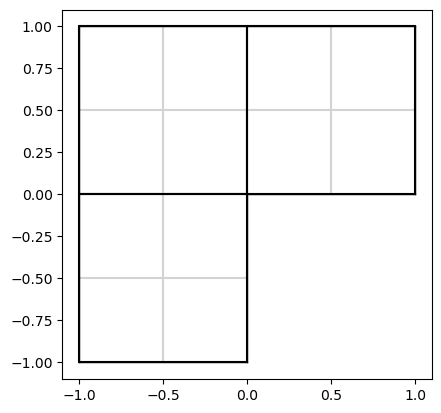

In [41]:
MP.mesh.draw(knots=True)

In [86]:
np.unique(np.concatenate([assemble.boundary_dofs(MP.mesh.kvs[0], [(a,b)], ravel=True) for a,b in itertools.product(*2*(range(2),))]))

array([0, 1, 2, 3, 5, 6, 7, 8])

In [84]:
list(itertools.product(*2*(range(2),)))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [81]:
list(itertools.product(range(3),range(3)))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [16]:
len(assemble.boundary_dofs(MP.mesh.kvs[0], bdspec=None, ravel=True))

8

In [17]:
kvs=3*(bspline.make_knots(1,0.0,1.0,5),)

In [34]:
assemble.boundary_dofs(kvs,[(0,0),(1,1),(2,0)],ravel=True)

array([30])